In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-17 09:27:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  43.3MB/s    in 2.4s    

2023-07-17 09:27:10 (43.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


`train` and `test` folder

In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Now, we have a collection of 750 training images and 250 testing images of pizza and steak.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


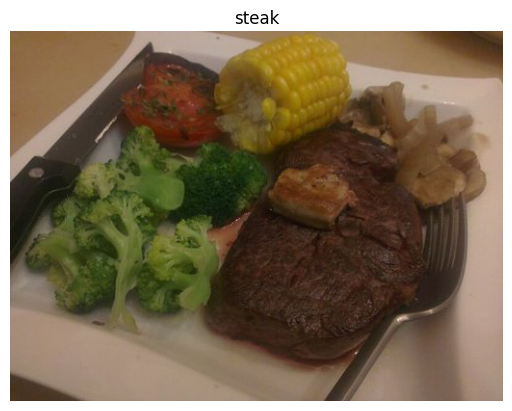

In [11]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

The computer sees the image is in the form of a big array (tensor).
To view the img (big array/tensor)

In [12]:
img

array([[[135, 100,  68],
        [135, 100,  68],
        [135, 100,  68],
        ...,
        [115,  76,  45],
        [116,  75,  45],
        [116,  75,  47]],

       [[135, 100,  68],
        [135, 100,  68],
        [135, 100,  68],
        ...,
        [118,  79,  48],
        [118,  79,  50],
        [118,  79,  50]],

       [[136, 102,  67],
        [137, 103,  68],
        [137, 103,  68],
        ...,
        [116,  80,  48],
        [119,  80,  51],
        [119,  80,  51]],

       ...,

       [[ 74,  52,  31],
        [ 74,  52,  31],
        [ 75,  53,  32],
        ...,
        [161, 139, 126],
        [162, 138, 126],
        [162, 138, 126]],

       [[ 76,  54,  33],
        [ 76,  54,  33],
        [ 76,  54,  33],
        ...,
        [159, 137, 124],
        [160, 136, 124],
        [160, 136, 124]],

       [[ 77,  55,  34],
        [ 77,  55,  34],
        [ 77,  55,  34],
        ...,
        [158, 136, 123],
        [158, 134, 122],
        [158, 134, 122]]

To view the image shape (width, height, color channels)

In [13]:
img.shape

(384, 512, 3)

When we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Therefore, the most common preprocessing steps for working with images is to **scale** (**normalize**) their pixel values by dividing the image arrays by 255.

In [14]:
img/255.

array([[[0.52941176, 0.39215686, 0.26666667],
        [0.52941176, 0.39215686, 0.26666667],
        [0.52941176, 0.39215686, 0.26666667],
        ...,
        [0.45098039, 0.29803922, 0.17647059],
        [0.45490196, 0.29411765, 0.17647059],
        [0.45490196, 0.29411765, 0.18431373]],

       [[0.52941176, 0.39215686, 0.26666667],
        [0.52941176, 0.39215686, 0.26666667],
        [0.52941176, 0.39215686, 0.26666667],
        ...,
        [0.4627451 , 0.30980392, 0.18823529],
        [0.4627451 , 0.30980392, 0.19607843],
        [0.4627451 , 0.30980392, 0.19607843]],

       [[0.53333333, 0.4       , 0.2627451 ],
        [0.5372549 , 0.40392157, 0.26666667],
        [0.5372549 , 0.40392157, 0.26666667],
        ...,
        [0.45490196, 0.31372549, 0.18823529],
        [0.46666667, 0.31372549, 0.2       ],
        [0.46666667, 0.31372549, 0.2       ]],

       ...,

       [[0.29019608, 0.20392157, 0.12156863],
        [0.29019608, 0.20392157, 0.12156863],
        [0.29411765, 0

# Architecture of a Convolutional Neural Network

There are 750 training images as well
as 250 test images per class and they're all of various different shapes.


First Model

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 256ms/step - loss: 0.5646 - accuracy: 0.7107 - val_loss: 0.3919 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4032 - accuracy: 0.8207 - val_loss: 0.4056 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 12s 261ms/step - loss: 0.3816 - accuracy: 0.8420 - val_loss: 0.3598 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3127 - accuracy: 0.8780 - val_loss: 0.2958 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.2445 - accuracy: 0.9033 - val_loss: 0.2903 - val_accuracy: 0.8700


To check the layers in our model

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Using the same model

In [20]:

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 317ms/step - loss: 0.6409 - accuracy: 0.6087 - val_loss: 0.5894 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6759 - accuracy: 0.5547 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 267ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


The model runs effectively but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Second model's architecture (To check the layers)

In [22]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

Adding extra layers or increasing the number of neurons (hidden units) in each layer is often referred to as increasing the **complexity** of the model.

# Trainable parameters are considered as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

In [24]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 227ms/step - loss: 2.7610 - accuracy: 0.6360 - val_loss: 0.5578 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.7605 - accuracy: 0.7080 - val_loss: 0.6564 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4962 - accuracy: 0.7753 - val_loss: 0.5497 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5707 - accuracy: 0.7500 - val_loss: 0.4281 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5685 - accuracy: 0.7593 - val_loss: 0.5098 - val_accuracy: 0.7460


Now our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

Third model's architecture (To check out the layers)

In [26]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary classification:

# 1. Import and visualize the data

In [28]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-17 10:45:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  32.5MB/s    in 3.2s    

2023-07-17 10:45:49 (32.5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



Image shape: (384, 512, 3)
Image shape: (512, 384, 3)


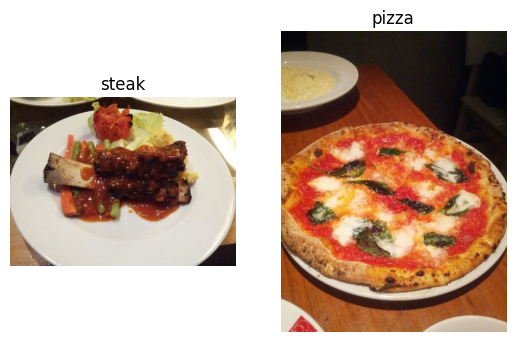

In [29]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (Define the training and test directory paths.)

In [30]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`]


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).


In [33]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Hence, our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images.

Sample Training Batch

In [34]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

Checking the first two images

In [37]:
images[:2], images[0].shape

(array([[[[0.01176471, 0.00784314, 0.03137255],
          [0.00392157, 0.        , 0.02352941],
          [0.00392157, 0.        , 0.02352941],
          ...,
          [0.01176471, 0.00784314, 0.03137255],
          [0.00392157, 0.        , 0.01960784],
          [0.01176471, 0.        , 0.02745098]],
 
         [[0.01176471, 0.00784314, 0.03137255],
          [0.00392157, 0.        , 0.02352941],
          [0.00392157, 0.        , 0.02352941],
          ...,
          [0.00392157, 0.        , 0.01960784],
          [0.00784314, 0.00392157, 0.03529412],
          [0.01176471, 0.01176471, 0.04313726]],
 
         [[0.00784314, 0.00392157, 0.02745098],
          [0.00392157, 0.        , 0.02352941],
          [0.00784314, 0.00392157, 0.02745098],
          ...,
          [0.01568628, 0.01960784, 0.03529412],
          [0.        , 0.        , 0.00784314],
          [0.00392157, 0.00392157, 0.01176471]],
 
         ...,
 
         [[0.00784314, 0.00392157, 0.02745098],
          [0.00392

Due to `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.


In [38]:
labels

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).

# 3. Create a model (start with a baseline)

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

Create a model that can be our baseline, a 3 layer Convolutional Neural Network

In [40]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

#And it follows the typical CNN structure of:

#```Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output```

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.
Note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.


Compile the model

In [41]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Since we're working on a binary classification problem (pizza vs. steak), the `loss` function we're using is `'binary_crossentropy'`, if it was mult-iclass, we might use something like `'categorical_crossentropy'`.

# Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

# 4. Fit a model

* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

Checking the lengths of training and test data generators

In [42]:
len(train_data), len(test_data)

(47, 16)

In [43]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 244ms/step - loss: 0.6758 - accuracy: 0.6887 - val_loss: 0.4286 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4014 - accuracy: 0.8287 - val_loss: 0.3797 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.2630 - accuracy: 0.9020 - val_loss: 0.4510 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 13s 277ms/step - loss: 0.1616 - accuracy: 0.9527 - val_loss: 0.3939 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.0642 - accuracy: 0.9840 - val_loss: 0.4236 - val_accuracy: 0.8360


### 5. Evaluate the model

Plot the training curves.

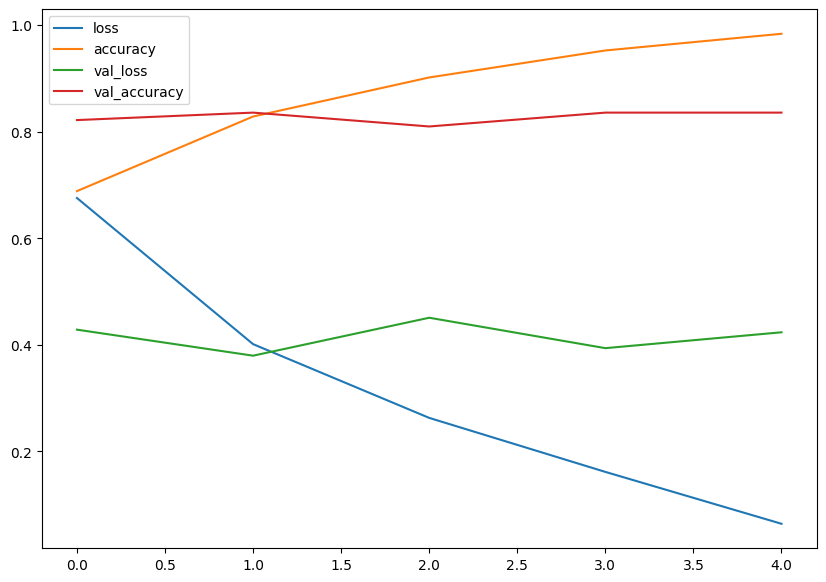

In [46]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Plotting the validation and training data separately

In [48]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Plotting the loss curves for model_4

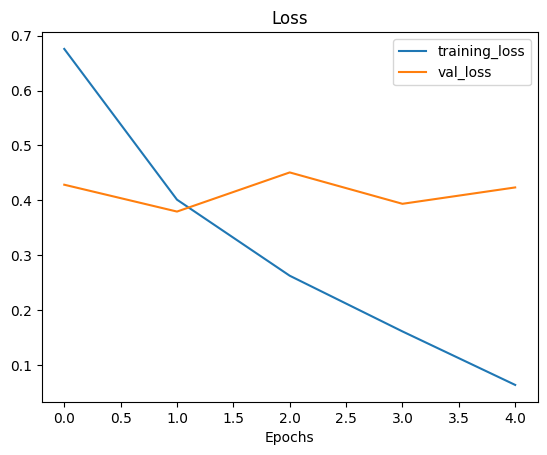

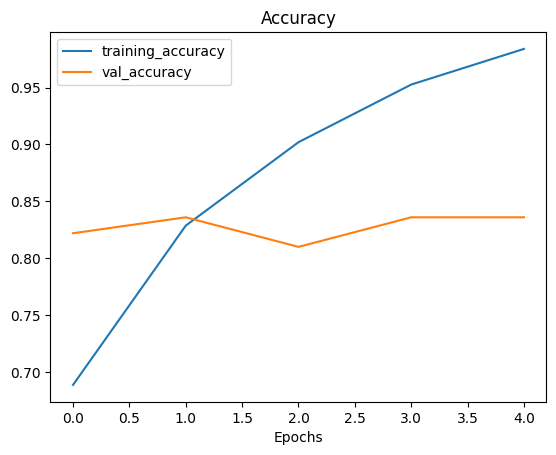

In [49]:
plot_loss_curves(history_4)

Fourth Model's Architecture (To check all the layers)

In [51]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_15 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# 6. Adjust the model parameters
We'll focus on getting our model's training curves to better align with eachother, in other words, we'll try to reduce the overfitting.

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Creating the model that can our baseline, a 3 layer Convolutional Neural Network.

In [53]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [54]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [55]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 233ms/step - loss: 0.5935 - accuracy: 0.6827 - val_loss: 0.4628 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4824 - accuracy: 0.7847 - val_loss: 0.3909 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4463 - accuracy: 0.8000 - val_loss: 0.4265 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4135 - accuracy: 0.8140 - val_loss: 0.3740 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4045 - accuracy: 0.8253 - val_loss: 0.3569 - val_accuracy: 0.8540


The model with max pooling (`model_5`) is performing worse on the training set but better on the validation set.


Checking the model architecture

In [56]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

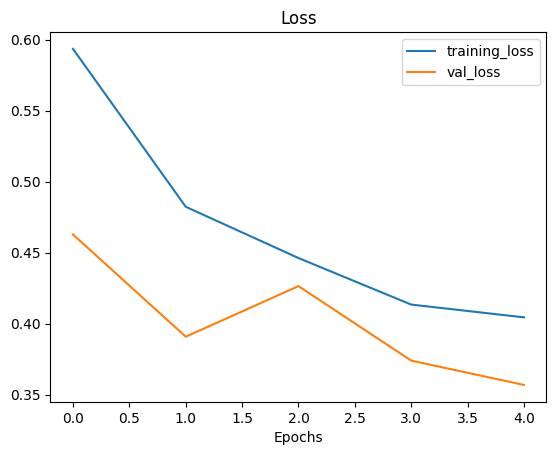

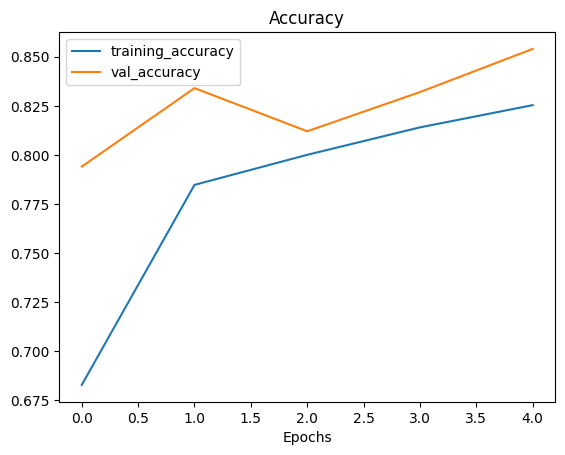

In [57]:
plot_loss_curves(history_5)

We see that the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.


Creating ImageDataGenerator training instance with Data Augmentation

In [59]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

Import data and augment it from training directory

In [60]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [61]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't augmented, they stay the same

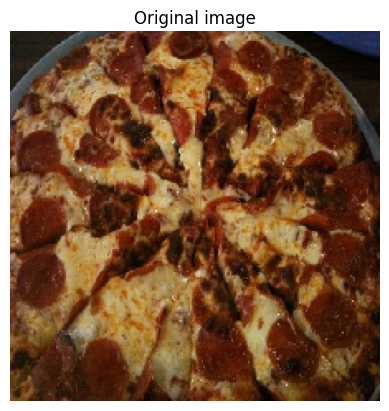

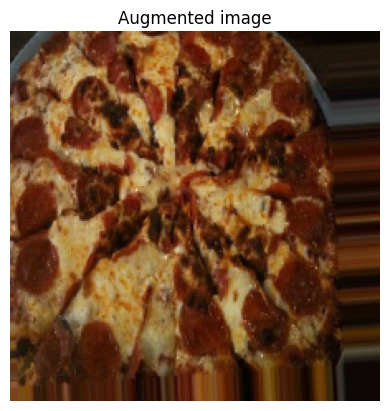

In [69]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Create the model (same as model_5)

In [71]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 534ms/step - loss: 0.6946 - accuracy: 0.5773 - val_loss: 0.9147 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 539ms/step - loss: 0.7116 - accuracy: 0.5567 - val_loss: 0.6574 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6773 - accuracy: 0.6067 - val_loss: 0.6152 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6540 - accuracy: 0.6287 - val_loss: 0.5464 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6121 - accuracy: 0.6893 - val_loss: 0.4763 - val_accuracy: 0.8140


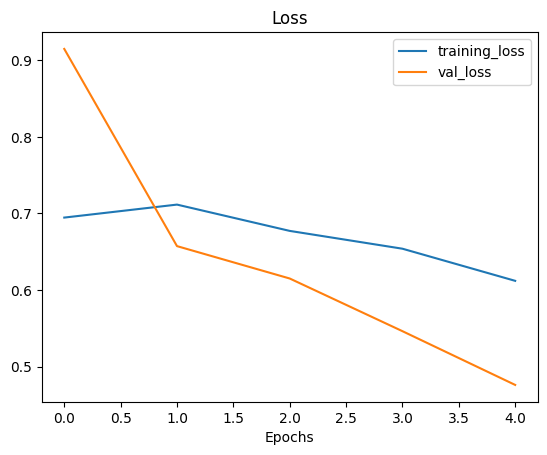

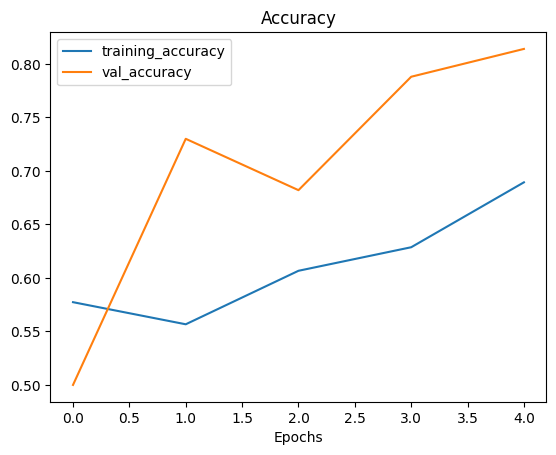

In [72]:
plot_loss_curves(history_6)

Now we shuffle the augmented training data. Importing data and augmenting it from directories.

In [73]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


Create the model (same as model_5 and model_6)

In [74]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 535ms/step - loss: 0.6456 - accuracy: 0.6253 - val_loss: 0.4797 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 28s 594ms/step - loss: 0.5358 - accuracy: 0.7360 - val_loss: 0.4206 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5038 - accuracy: 0.7653 - val_loss: 0.4337 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 25s 527ms/step - loss: 0.5085 - accuracy: 0.7513 - val_loss: 0.3842 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.4706 - accuracy: 0.7827 - val_loss: 0.4735 - val_accuracy: 0.7620


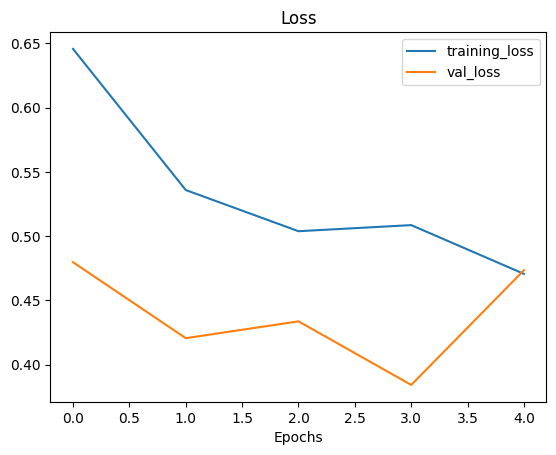

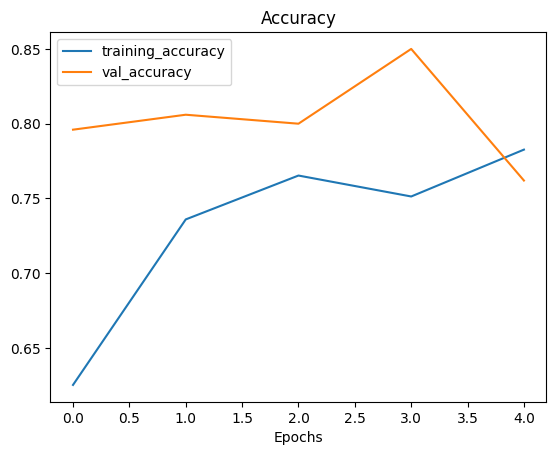

In [75]:
plot_loss_curves(history_7)

# Create a CNN model

In [76]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 538ms/step - loss: 0.6511 - accuracy: 0.6293 - val_loss: 0.4910 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5070 - accuracy: 0.7580 - val_loss: 0.4309 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.4880 - accuracy: 0.7680 - val_loss: 0.4695 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 25s 543ms/step - loss: 0.4876 - accuracy: 0.7787 - val_loss: 0.3269 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4559 - accuracy: 0.7907 - val_loss: 0.3364 - val_accuracy: 0.8640


There is a change in `model_8` as compared to `model_1`. This is because of the imports we did before, such as `from tensorflow.keras.layers import Conv2D` reduce the amount of code we had to write. Although the code is different, the architectures are the same.

In [77]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [78]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

 TinyVGG model's performance.

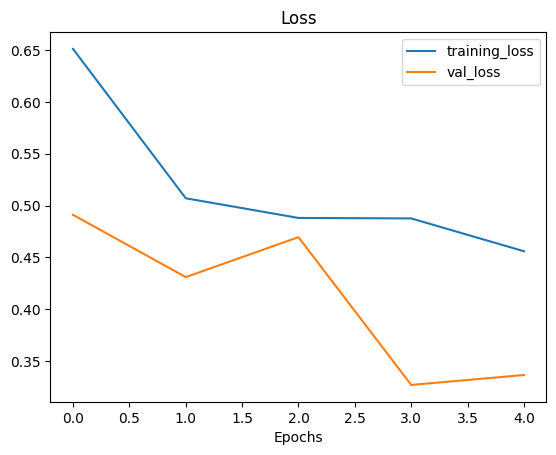

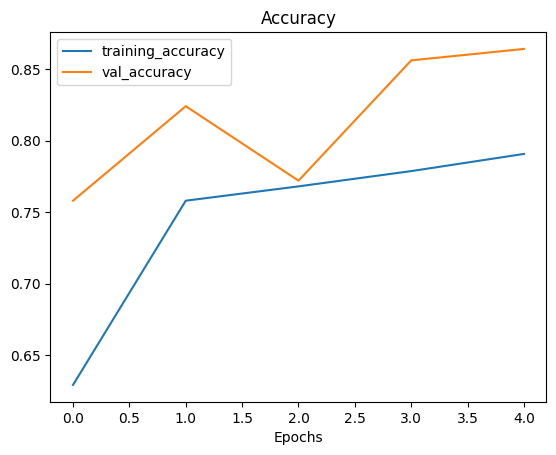

In [82]:
plot_loss_curves(history_8)

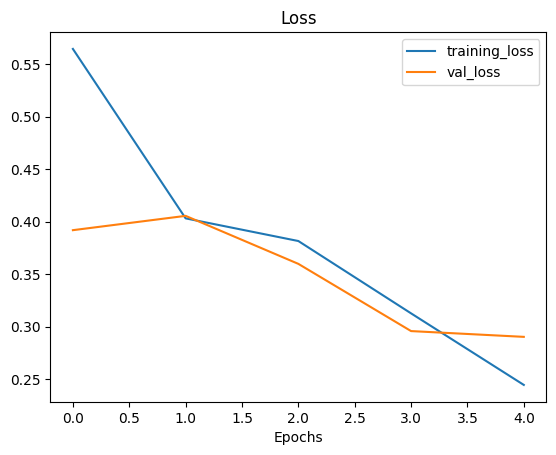

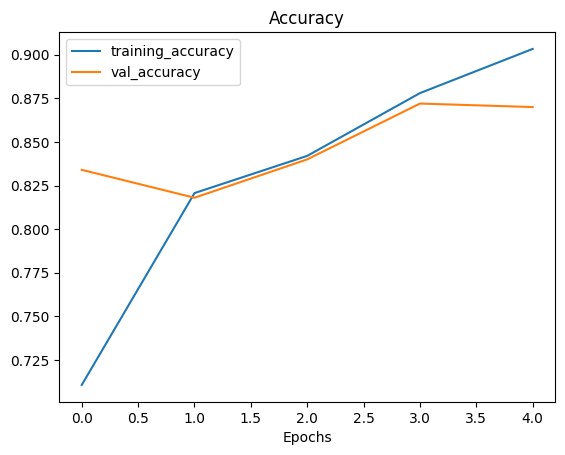

In [83]:
plot_loss_curves(history_1)

# Making a prediction with our trained model


In [84]:
print(class_names)

['pizza' 'steak']


View our example image

--2023-07-17 11:57:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-07-17 11:57:23 (79.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



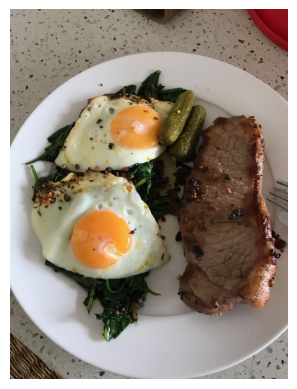

In [86]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [87]:
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

In [88]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

We have a function to load our custom image. Loading it in and preprocessing our custom image

In [90]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [91]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

Our custom image has a batch size of 1 now. Making a prediction on custom image tensor

In [92]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 219ms/step


array([[0.8743107]], dtype=float32)

In [93]:
class_names

array(['pizza', 'steak'], dtype='<U5')

We index the predicted class by rounding the prediction probability

In [94]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [96]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step


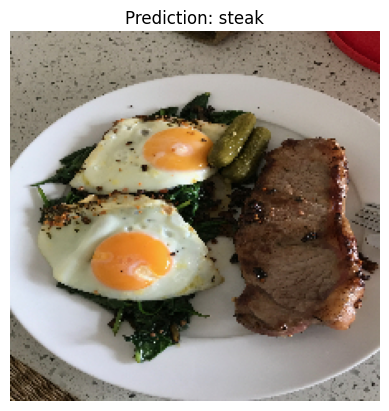

In [104]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

In [105]:
steak.shape

TensorShape([1, 224, 224, 3])

Since our model takes in images of shapes `(224, 224, 3)`, we reshape our custom image to use it with our model.
To make predictions on custom data, it has to be in the same form that your model has been trained on.

In [106]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [107]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`

In [108]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [109]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 21ms/step


array([[0.8743107]], dtype=float32)

The prediction come out in **prediction probability** form. This means how likely the image is to be one class or another.

In [110]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [111]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [112]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


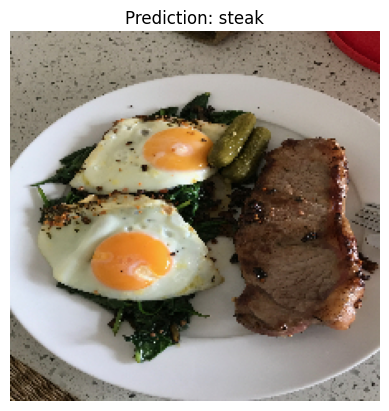

In [113]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-07-17 12:23:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.4’

03-pizza-dad.jpeg.4 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-07-17 12:23:56 (95.2 MB/s) - ‘03-pizza-dad.jpeg.4’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


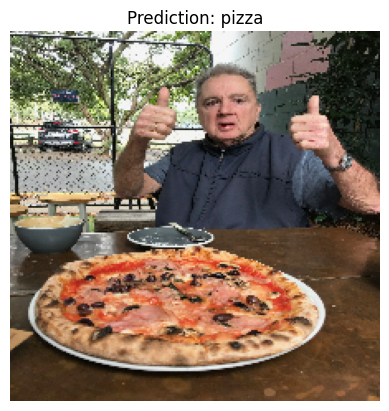

In [117]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)